In [11]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt


In [12]:
df = pd.read_csv('HealthDataXCharges.csv')

In [13]:
df

,id,age,sex,bmi,marital_status,smoker,country,alcohol,allergies,medicines,illness_history,charges
0,1000,85,Female,29,Common-Law,0,Puerto Rico,0,0,Atenolol,Autoimmune,154.31
1,1001,45,Male,24,Divorced,0,Martinique,0,0,Cialis,Oncology,148.14
2,1002,38,Female,25,Divorced,0,South Africa,1,0,Plavix,Endocrine,140.77
3,1003,17,Male,18,Single,0,Belarus,1,0,Atenolol,Neurological,141.33
4,1004,79,Female,34,Married,1,Algeria,1,1,NaN,Endocrine,161.64
...,...,...,...,...,...,...,...,...,...,...,...,...
495,1495,12,Female,44,Common-Law,1,Antarctica,0,1,Actos,Ophthalmic,141.79
496,1496,15,Male,23,Single,0,Poland,0,1,Flovent HFA,DigestiveSystem,172.18
497,1497,54,Male,42,Divorced,0,Mongolia,0,1,Sertraline HCl,NaN,136.42
498,1498,67,Female,18,Single,1,Spain,0,1,Prednisone,NaN,140.03


Decide what values constitute as PHI
age,sex, bmi, marital_status, country, medicines, illness_history, charges

Supressed Patient Values

In [14]:
#remove random val

generalized patient values

randomized patient values.

In [15]:
df_randomizedValues = df.copy()
rando_3 = random.randint(-3,3)
#age +/- 2
for index, value in df_randomizedValues['age'].items():
    rando_2 = random.randint(-2,2)
    df_randomizedValues.at[index,'age'] = value + (rando_2)


#bmi +/- 3
for index, value in df_randomizedValues['bmi'].items():
    rando_3 = random.randint(-3,3)
    df_randomizedValues.at[index,'bmi'] = value + (rando_3)

#charges +/5.00
for index, value in df_randomizedValues['charges'].items():
    rando_float = random.uniform(-5.00,5.00)
    new_value = value + (rando_float)
    df_randomizedValues.at[index,'charges'] = round(new_value, 2)
df_randomizedValues.head(5)

,id,age,sex,bmi,marital_status,smoker,country,alcohol,allergies,medicines,illness_history,charges
0,1000,87,Female,28,Common-Law,0,Puerto Rico,0,0,Atenolol,Autoimmune,155.34
1,1001,46,Male,27,Divorced,0,Martinique,0,0,Cialis,Oncology,151.21
2,1002,38,Female,25,Divorced,0,South Africa,1,0,Plavix,Endocrine,141.39
3,1003,17,Male,19,Single,0,Belarus,1,0,Atenolol,Neurological,143.94
4,1004,78,Female,37,Married,1,Algeria,1,1,NaN,Endocrine,166.45


In [16]:
df.head(5)

,id,age,sex,bmi,marital_status,smoker,country,alcohol,allergies,medicines,illness_history,charges
0,1000,85,Female,29,Common-Law,0,Puerto Rico,0,0,Atenolol,Autoimmune,154.31
1,1001,45,Male,24,Divorced,0,Martinique,0,0,Cialis,Oncology,148.14
2,1002,38,Female,25,Divorced,0,South Africa,1,0,Plavix,Endocrine,140.77
3,1003,17,Male,18,Single,0,Belarus,1,0,Atenolol,Neurological,141.33
4,1004,79,Female,34,Married,1,Algeria,1,1,NaN,Endocrine,161.64


k-anonymized
Similar to generalized values but we need to make sure that a min of 5 people can fit within each generalization

In [17]:
df_k_anonymize = df.copy()

In [18]:
# for age lets try groups of 10 years
age_groups = ['1-10 years old', '10-20 years old', '20-30 years old', '30-40 years old', '40-50 years old','50-60 years old','60-70 years old', '70-80 years old','80-90 years old','90-100 years old', '100+ years old']
hist, bins = np.histogram(df_k_anonymize['age'], bins=10)
df_k_anonymize['age'] = pd.cut(df_k_anonymize['age'], bins=bins, labels=age_groups[:-1])
#bmi will be by 3
bmi_groups = ['15-18 bmi','18-21 bmi','21-24 bmi','24-27 bmi', '27-30 bmi','30-33 bmi','33-36 bmi','36-39 bmi','39-41 bmi','41-44 bmi','44+ bmi']
hist, bins = np.histogram(df_k_anonymize['bmi'], bins=10)
df_k_anonymize['bmi'] = pd.cut(df_k_anonymize['bmi'], bins=bins, labels=bmi_groups[:-1])
df_k_anonymize.head(5)

,id,age,sex,bmi,marital_status,smoker,country,alcohol,allergies,medicines,illness_history,charges
0,1000,80-90 years old,Female,27-30 bmi,Common-Law,0,Puerto Rico,0,0,Atenolol,Autoimmune,154.31
1,1001,40-50 years old,Male,21-24 bmi,Divorced,0,Martinique,0,0,Cialis,Oncology,148.14
2,1002,30-40 years old,Female,24-27 bmi,Divorced,0,South Africa,1,0,Plavix,Endocrine,140.77
3,1003,10-20 years old,Male,15-18 bmi,Single,0,Belarus,1,0,Atenolol,Neurological,141.33
4,1004,70-80 years old,Female,33-36 bmi,Married,1,Algeria,1,1,NaN,Endocrine,161.64


(array([43., 53., 54., 51., 49., 40., 48., 42., 56., 64.]),
 array([15., 18., 21., 24., 27., 30., 33., 36., 39., 42., 45.]),
 <BarContainer object of 10 artists>)

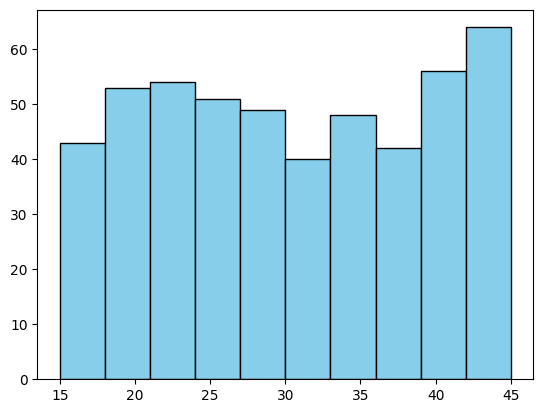

In [19]:
data = df['bmi'].tolist()
plt.hist(data, color='skyblue', edgecolor='black')

In [20]:
bmi_groups = ['15-18 bmi','18-21 bmi','21-24 bmi','24-27 bmi', '27-30 bmi','30-33 bmi','33-36 bmi','36-39 bmi','39-41 bmi','41-44 bmi','44+ bmi']
hist, bins = np.histogram(df_k_anonymize['bmi'], bins=10)
df_k_anonymize['bmi'] = pd.cut(df_k_anonymize['bmi'], bins=bins, labels=bmi_groups[:-1])
df_k_anonymize

TypeError: '<=' not supported between instances of 'str' and 'float'

In [ ]:
df

In [6]:
!pip install rpy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.0/220.0 kB 4.6 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [34 lines of output]
      ld: library 'icuuc' not found
      clang: error: linker command failed with exit code 1 (use -v to see invocation)
      Traceback (most recent call last):
        File "/private/var/folders/g2/083sznd95s3bg6b4np16l62h0000gn/T/pip-build-env-9kp25kt5/overlay/lib/python3.9/site-packages/setuptools/_distutils/unixccompiler.py", line 269, in link
          self.spawn(linker + ld_args)
        File "/private/var/folders/g2/083sznd95s3bg6b4np16l62h0000gn/T/pip-build-env-9kp25kt5/overlay/lib/python3.9/site-packages/setuptools/_distutils/ccompiler.py", line 1041, in spawn
          spawn(cmd, dry_run=self.dry_run, **kwargs)
        File "/private/var/folders/g2/0

In [4]:
from pyarx import Anonymizer, Data

# Load your dataset
data = Data.from_csv('HealthDataXCharges.csv', delimiter=',')

# Define the k-anonymity criterion
k = 5

# Create an Anonymizer object
anonymizer = Anonymizer(data)

# Perform k-anonymity
anonymized_data = anonymizer.anonymize(k=k)
print(anonymized_data)
# Save the anonymized dataset
anonymized_data.to_csv('anonymized_healthcare_data.csv')


ModuleNotFoundError: No module named 'pyarx'